# Introduction

In the following notebook, I will be performing an EDA of Airbnb data in the San Francisco area. This data pertains to the last calendar year, which at the time of this analysis would from December 2018 through December 2019.

*GitHub Repo References*
The raw data files can be found [here](https://github.com/KishenSharma6/practice/tree/master/Data/01_Raw/SF%20Airbnb%20Raw%20Data).

The raw data aggregation script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/01.%20Raw%20Data%20Aggregation%20Scripts/2020_0129_Airbnb_Raw_Data_Aggregation.ipynb).

The data cleaning script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/02.%20Data%20Cleaning%20Scripts/2020_0130_Listings_Cleaning.ipynb).

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [220]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

**Read in Data**

In [221]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#list columns with date information to parse
dates = ['first_review', 'host_since', 'last_review']

#Read listings Data
df = pd.read_csv(path + '2020_0201_Listings_Cleaned.csv',index_col=0, low_memory=False, 
                 dtype={'review_scores_accuracy':'category','review_scores_checkin':'category','review_scores_cleanliness':'category',
                        'review_scores_communication':'category','review_scores_location':'category','review_scores_value':'category'} ,
                          sep=',', parse_dates=dates)

**Set notebook preferences**

In [222]:
#Set pandas options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:.0f}'.format

#Set plot aesthetics
plt.style.use('ggplot')

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

## Data Preview

In [223]:
#Preview data
print('Listings shape:', df.shape)
display(df.head())

Listings shape: (98781, 75)


,access,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,state,summary,transit,zipcode,weekday,day,month,year,month_year
90917,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,23,92,1,Real Bed,1,2,1,0,0,7 months ago,strict_14_with_grace_period,San Francisco,120,"Great 1-bedroom,1-bath on border between the M...",10,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2,"San Francisco, California, United States",Paul,Mission District,100,within an hour,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,38,Unavailable,-122,60,30,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0,175,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100,10.0,0,Entire home/apt,1000,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
75033,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,119,1,Real Bed,1,2,1,0,0,9 months ago,strict_14_with_grace_period,San Francisco,120,"Great 1-bedroom,1-bath on border between the M...",10,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2,"San Francisco, California, United States",Paul,Mission District,100,within an hour,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,38,Unavailable,-122,60,30,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0,175,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100,10.0,0,Entire home/apt,1000,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
60532,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,40,1,Real Bed,1,2,1,0,0,3 weeks ago,strict_14_with_grace_period,San Francisco,120,"Great 1-bedroom,1-bath on border between the M...",10,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2,"San Francisco, California, United States",Paul,Mission District,100,within a few hours,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,38,Unavailable,-122,60,31,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0,175,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100,10.0,0,Entire home/apt,1000,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
37974,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,42,1,Real Bed,1,2,1,0,0,6 weeks ago,strict_14_with_grace_period,San Francisco,80,"Great 1-bedroom,1-bath on border between the M...",10,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2,"San Francisco, California, United States",Paul,Mission District,100,within a few hours,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable

In [224]:
#View data types
df.dtypes

access                                      object
accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Exploratory Data Analysis

## Target variable values of interest

**Review Scores Rating**

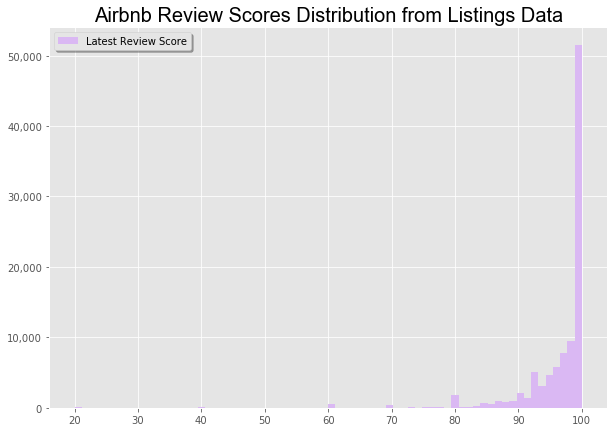

In [225]:
#Set title and label fonts
csfont = {'fontname':'Comic Sans MS'}
afont = {'fontname':'Arial'}

#plot hist
g =df.review_scores_rating.hist(figsize=(10,7), bins = 70,color = '#dab8f3', label = 'Latest Review Score')

#Set font dictionaries
dict_title= {'fontweight' : 'medium', 'fontsize' : 20,
            'fontname':'Arial'}

#Set plot aesthetics
g.set_title('Airbnb Review Scores Distribution from Listings Data', dict_title)
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
g.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)

**Listing Price**

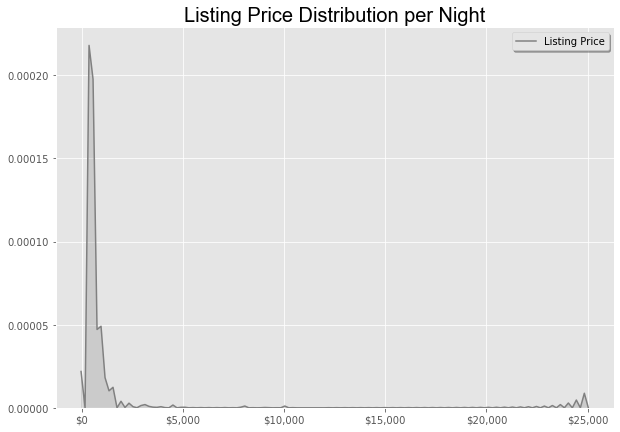

In [226]:
fig, ax = plt.subplots(figsize=(10,7))

#KDE
j = sns.kdeplot(df.price, shade=True, color="grey",ax=ax, label = 'Listing Price')

#Set plot aesthetics
j.set_title('Listing Price Distribution per Night', fontdict =dict_title)
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)

### Numeric variable distributions

Text(0.5, 0.92, 'Listings Distributions')

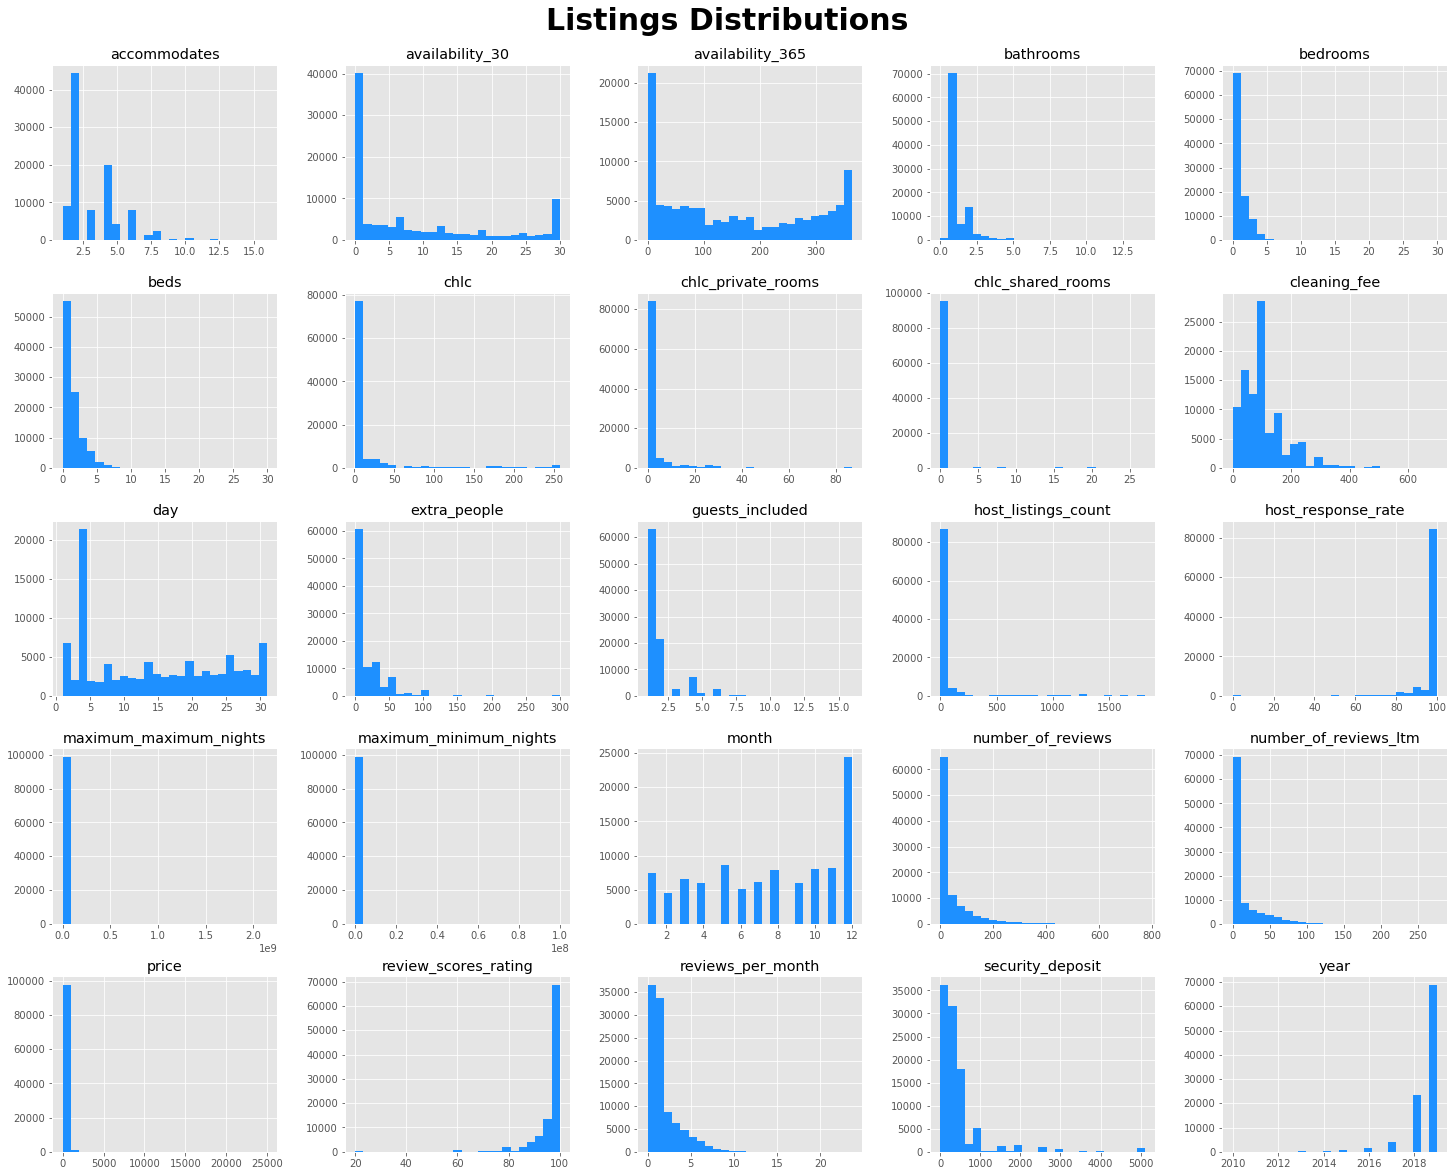

In [227]:
#Capture numeric data from df
numerics = df.select_dtypes(include = ['int64','float64'])

#Drop columns relating to geography or id data 
numerics.drop(columns = ['latitude', 'longitude', 'host_id', 'id'], inplace = True)

#View data distributions
numerics.hist(figsize = (25,20), bins = 25, color = 'dodgerblue');

#Set plot aesthtics
plt.suptitle("Listings Distributions",fontweight='bold', fontsize = 30, y =.92, color = 'k')


### Boolean distributions

Text(0.5, 0.95, 'Boolean Distributions')

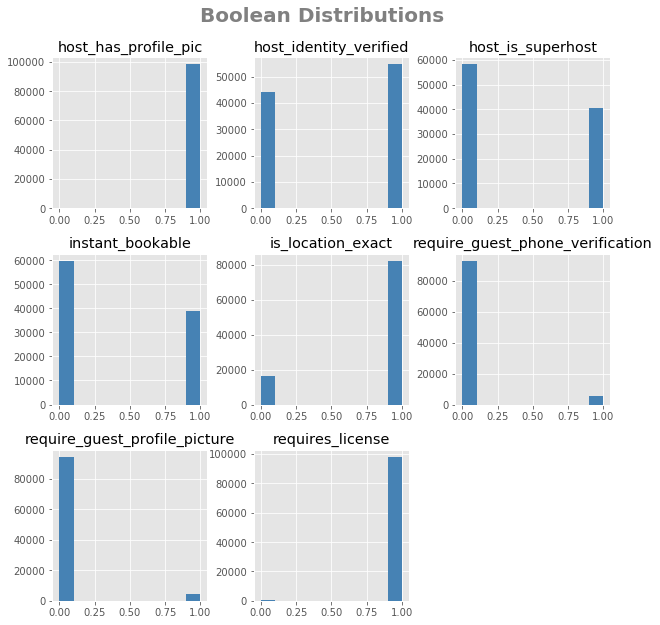

In [228]:
#Plot histogram of booleans in listings data
df.select_dtypes(include = ['bool']).astype(float).hist(figsize =(10,10), color = 'steelblue');

#Set plot aesthtics
plt.suptitle("Boolean Distributions",fontweight='bold', color = 'gray', fontsize = 20, y =.95)

## Different relationships with Price

#### Prices across San Francisco

In [229]:
#Import geopandas to plot lat, long data
import geopandas as gpd

#Read in Airbnb neighborhoods geojson data
fname = r"C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\References/Airbnb Neighbourhoods.geojson"

#load geojson filt into a pandas df,sort, and view
neighborhoods = gpd.read_file(fname)
neighborhoods.sort_values(by = 'neighbourhood', inplace=True)
display(neighborhoods.head(10))

,neighbourhood,neighbourhood_group,geometry
20,Bayview,None,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881..."
29,Bernal Heights,None,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281..."
27,Castro/Upper Market,None,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464..."
30,Chinatown,None,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088..."
11,Crocker Amazon,None,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238..."
4,Diamond Heights,None,"MULTIPOLYGON (((-122.43553 37.74146, -122.4356..."
3,Downtown/Civic Center,None,"MULTIPOLYGON (((-122.40891 37.79013, -122.4088..."
12,Excelsior,None,"MULTIPOLYGON (((-122.44082 37.71646, -122.4382..."
14,Financial District,None,"MULTIPOLYGON (((-122.39425 37.80007, -122.3942..."
25,Glen Park,None,"MULTIPOLYGON (((-122.42418 37.74226, -122.4239..."


In [230]:
#Assign average rent per night to geo data for plotting
neighborhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean().values

#Create coords column to plot neighborhood name on visualization
neighborhoods['coords'] = neighborhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhoods['coords'] = [coords[0] for coords in neighborhoods['coords']]

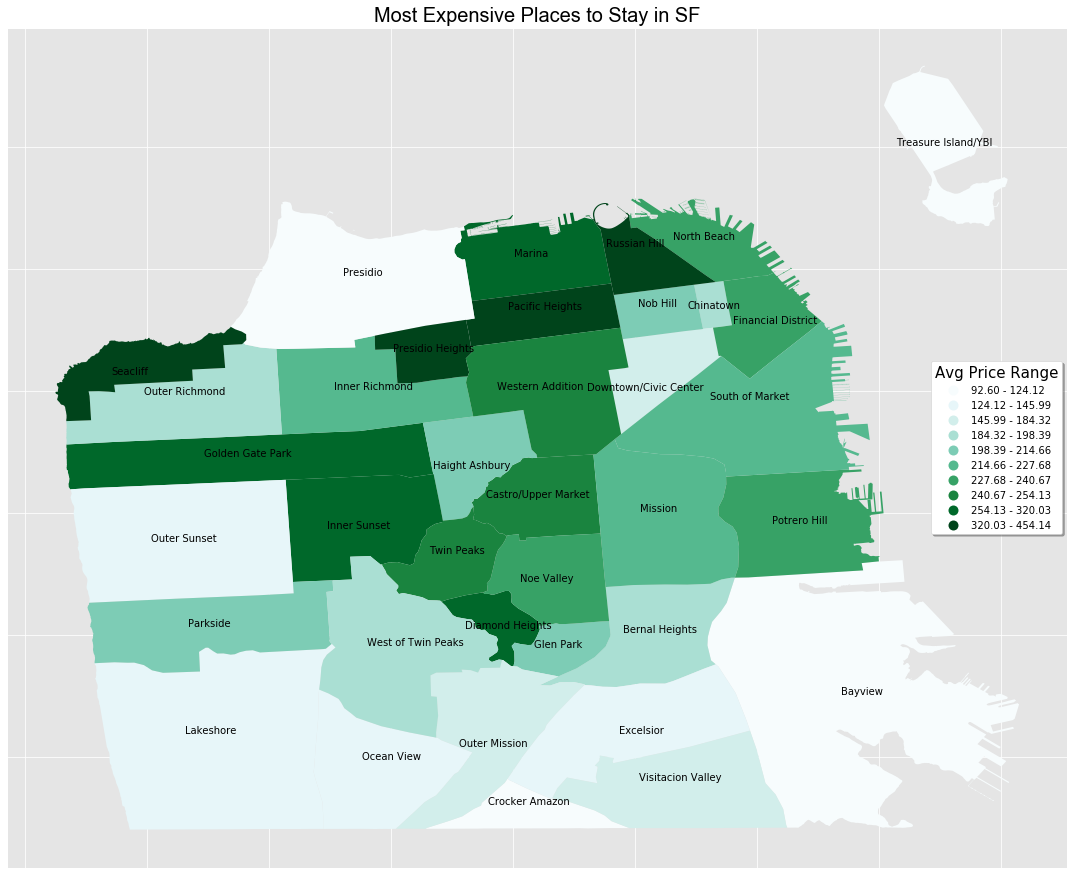

In [231]:
#Plot geodata to reflect average price for a one night stay per neighborhood
ax = neighborhoods.plot(column ='avg_price', legend = True,cmap="BuGn",
                        legend_kwds={'loc': 'right','title': 'Avg Price Range',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighborhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],
                 horizontalalignment='center')

#Set plot aesthetics
ax.set_title('Most Expensive Places to Stay in SF', fontdict=dict_title)
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)

##### Most popular Neighborhoods in Sf

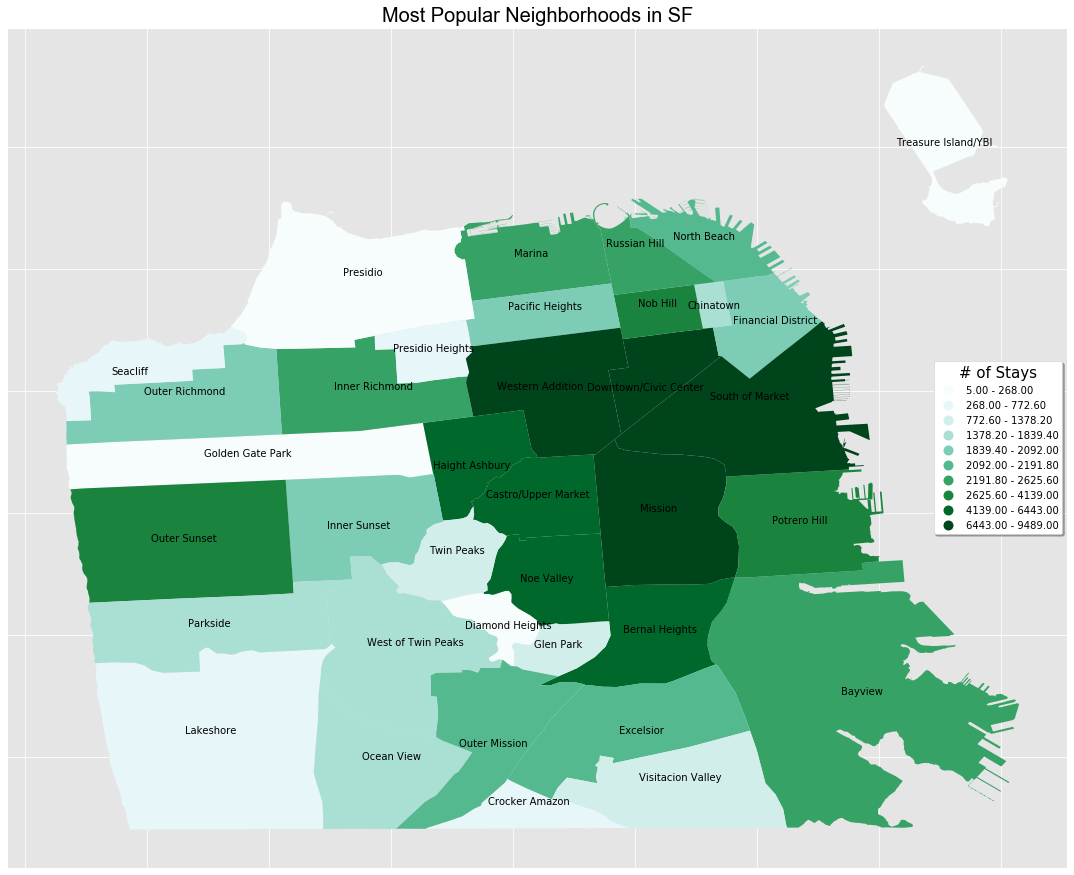

In [232]:
#Most popular neighborhoods
neighborhoods['num_listings']= df.groupby('neighbourhood_cleansed')['id'].count().values

#Plot geodata
ax = neighborhoods.plot(column ='num_listings', legend = True,cmap ='BuGn',
                     legend_kwds={'loc': 'right','title': '# of Stays',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighborhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],
                 horizontalalignment='center')

#Set plot aesthetics
ax.set_title('Most Popular Neighborhoods in SF', fontdict=dict_title)
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)

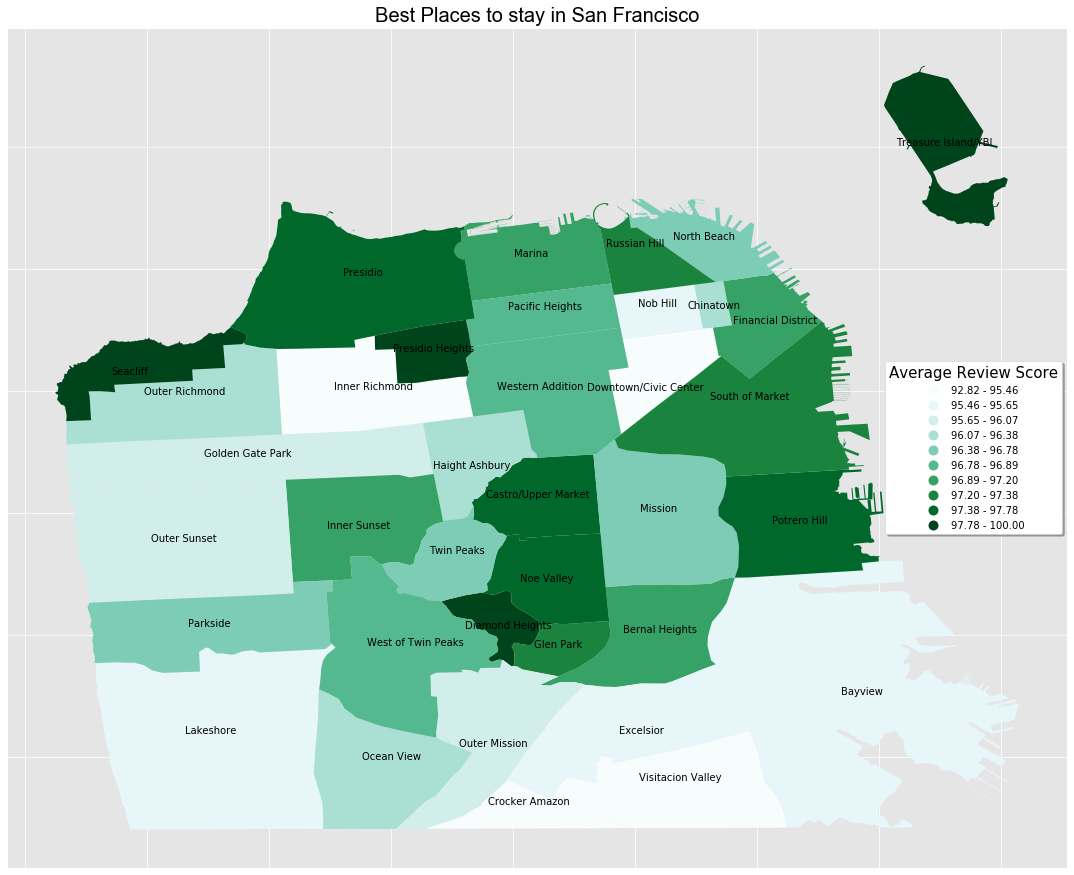

In [233]:
#Most popular neighborhoods
neighborhoods['review_scores']= df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().values

#Plot geodata
ax = neighborhoods.plot(column ='review_scores', legend = True,cmap ='BuGn',
                     legend_kwds={'loc': 'right','title': 'Average Review Score',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighborhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],
                 horizontalalignment='center')

#Set plot aesthetics
ax.set_title('Best Places to stay in San Francisco', fontdict=dict_title)
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)

**Average price by property type**

Text(0, 0.5, '')

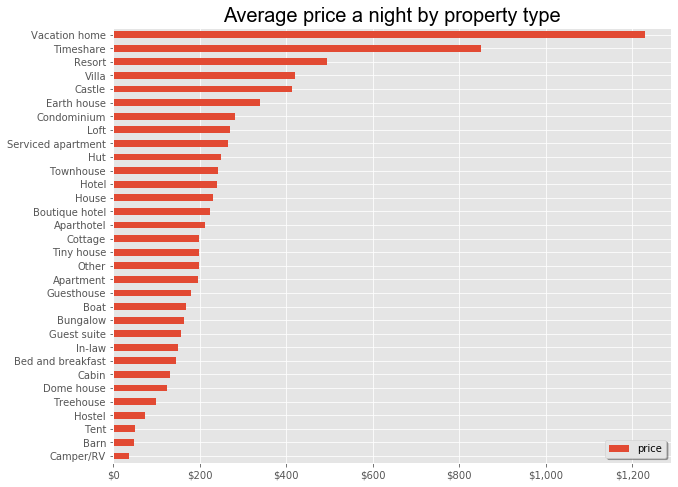

In [234]:
#Capture means of each property_type
prop_mean = df.groupby('property_type')['price'].mean().sort_values(ascending = False).reset_index()

#plot data
g = prop_mean.plot(x = 'property_type', y = 'price', kind = 'barh', figsize = (10,8))

#Set plot aesthetics
g.set_title('Average price a night by property type',fontdict= dict_title )
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.legend(frameon = True, fancybox=True, shadow = True,fontsize = 10)
g.invert_yaxis()
g.set_ylabel('')

**View median and spreads of high price property types(w/o outliers)**

Text(0.5, 0, '')

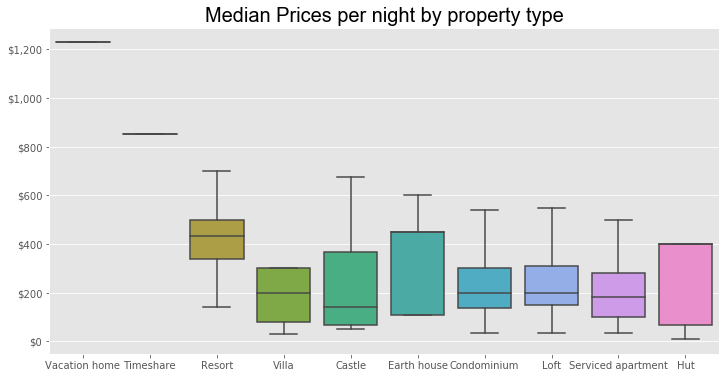

In [235]:
#Get top 10 highest prices property types and assign to a list to  be indexed
top10 = list(prop_mean['property_type'].head(10))

#Set plot
fig, ax = plt.subplots(figsize = (12,6))

#Plot data
g = sns.boxplot('property_type','price', data=df[df.property_type.isin(top10)],  showfliers = False, order = top10)

#Set plot aesthetics
g.set_title('Median Prices per night by property type',fontdict= dict_title )
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.set_ylabel('')
g.set_xlabel('')

### Prices by day of the week

Text(0.5, 0, '')

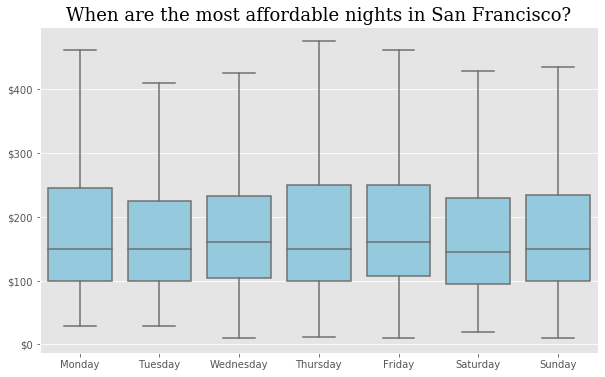

In [236]:
#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot Data
g = sns.boxplot(x = 'weekday', y ='price', data = df, showfliers = False,  color = 'skyblue',
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
           ax=ax)

#Set plot aesthetics
g.set_title('When are the most affordable nights in San Francisco?',fontsize = 18, family = 'serif' )
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))
g.set_ylabel('')
g.set_xlabel('')

#Prices by month

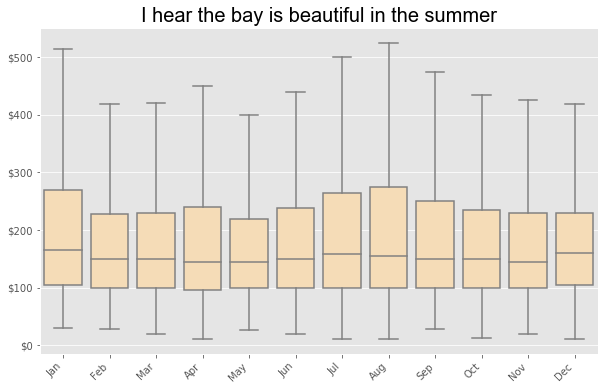

In [237]:
fig, ax = plt.subplots(figsize=(10, 6))

g =sns.boxplot(x = 'month', y='price', data=df, color='navajowhite',
            showfliers = False, ax = ax )

#Set plot aesthetics
g.set_title('I hear the bay is beautiful in the summer',fontdict= dict_title )
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))
g.set_ylabel('')
g.set_xlabel('')
plt.xticks(rotation=45, horizontalalignment='right',);
g.set(xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']);


## review_scores_rating

Super hosta

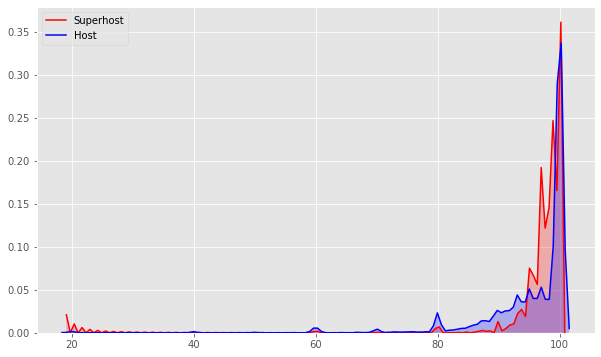

In [238]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.kdeplot(df[df.host_is_superhost == True]['review_scores_rating'], shade=True, color="r", label = 'Superhost', ax=ax)


j = sns.kdeplot(df[df.host_is_superhost == False]['review_scores_rating'], shade=True, color="b", label = 'Host', ax=ax)


In [239]:
reviews = df[['host_response_rate','number_of_reviews','review_scores_rating','reviews_per_month','host_is_superhost' ]]

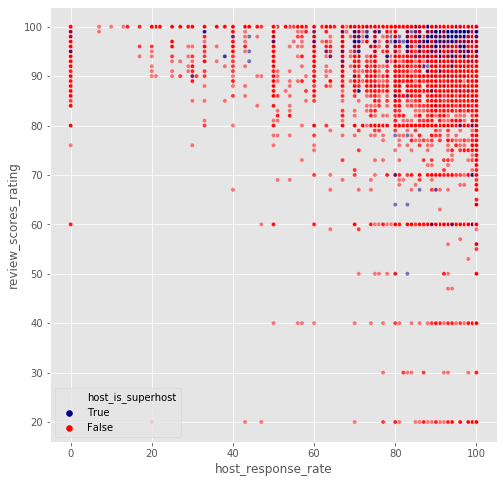

In [240]:
fig, ax = plt.subplots(figsize = (8,8))

sns.scatterplot('host_response_rate','review_scores_rating',hue = 'host_is_superhost', data = reviews,hue_order=[True, False],
                palette=['navy', 'red'],
               alpha= 0.5, s= 20, edgecolor= 'w', ax=ax);